# Setup Environment

In [38]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [39]:
place_path = 'Placement_Data_Full_Class.csv'
place_df = pd.read_csv(place_path)
place_df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# Data Exploration

## Raw Dataset

In [40]:
place_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [41]:
place_df.nunique()

sl_no             215
gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
salary             45
dtype: int64

In [42]:
X = place_df.iloc[:,1:-2]
y = place_df.status

## Features

In [43]:
place_df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [44]:
cat_col = [col for col in X.columns if X.loc[:,col].dtype=='object']
num_col = list(set(X.columns)-set(cat_col))

In [45]:
X[cat_col].describe()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation
count,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin
freq,139,116,131,113,145,141,120


In [46]:
X[num_col].describe()

,degree_p,mba_p,ssc_p,hsc_p,etest_p
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,66.370186,62.278186,67.303395,66.333163,72.100558
std,7.358743,5.833385,10.827205,10.897509,13.275956
min,50.000000,51.210000,40.890000,37.000000,50.000000
25%,61.000000,57.945000,60.600000,60.900000,60.000000
50%,66.000000,62.000000,67.000000,65.000000,71.000000
75%,72.000000,66.255000,75.700000,73.000000,83.500000
max,91.000000,77.890000,89.400000,97.700000,98.000000


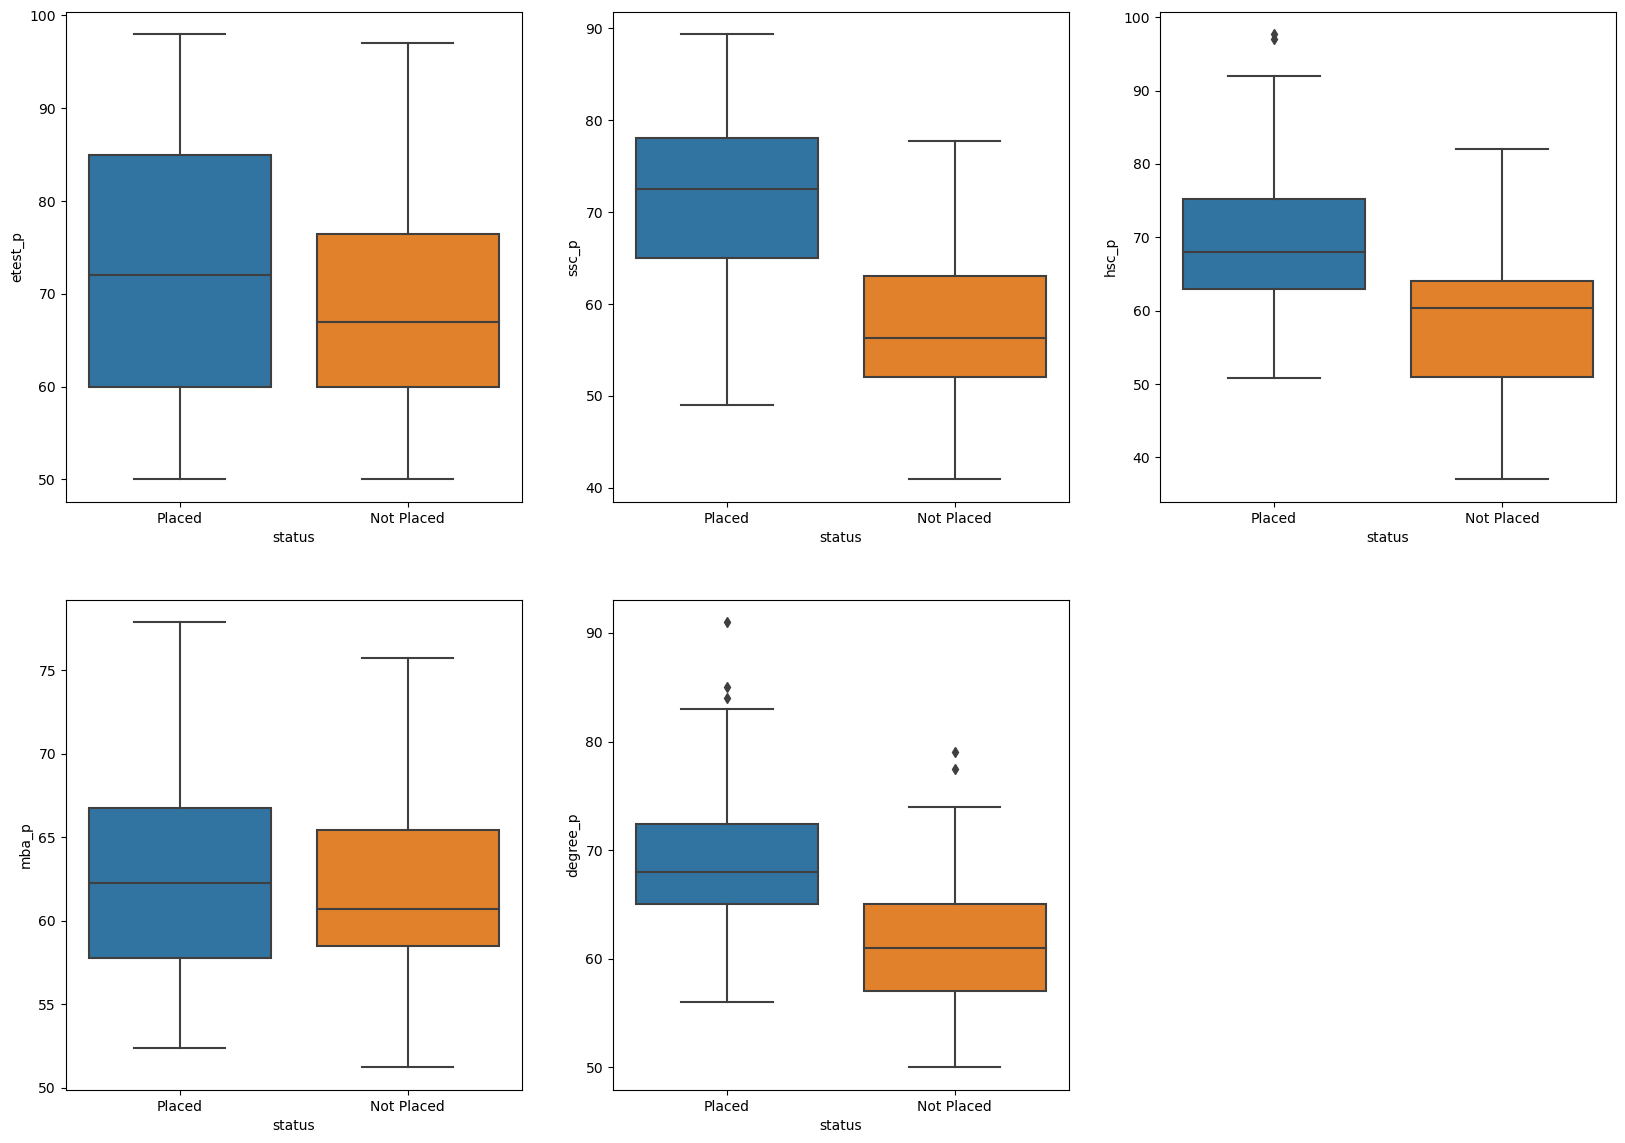

In [47]:
# boxplot for numerical feature
fig ,axss = plt.subplots(2,3, figsize=[20,14])
sns.boxplot(x='status', y ='etest_p', data=place_df, ax=axss[0][0])
sns.boxplot(x='status', y ='ssc_p', data=place_df, ax=axss[0][1])
sns.boxplot(x='status', y ='hsc_p', data=place_df, ax=axss[0][2])
sns.boxplot(x='status', y ='mba_p', data=place_df, ax=axss[1][0])
sns.boxplot(x='status', y ='degree_p', data=place_df, ax=axss[1][1])
fig.delaxes(axss[1][2])

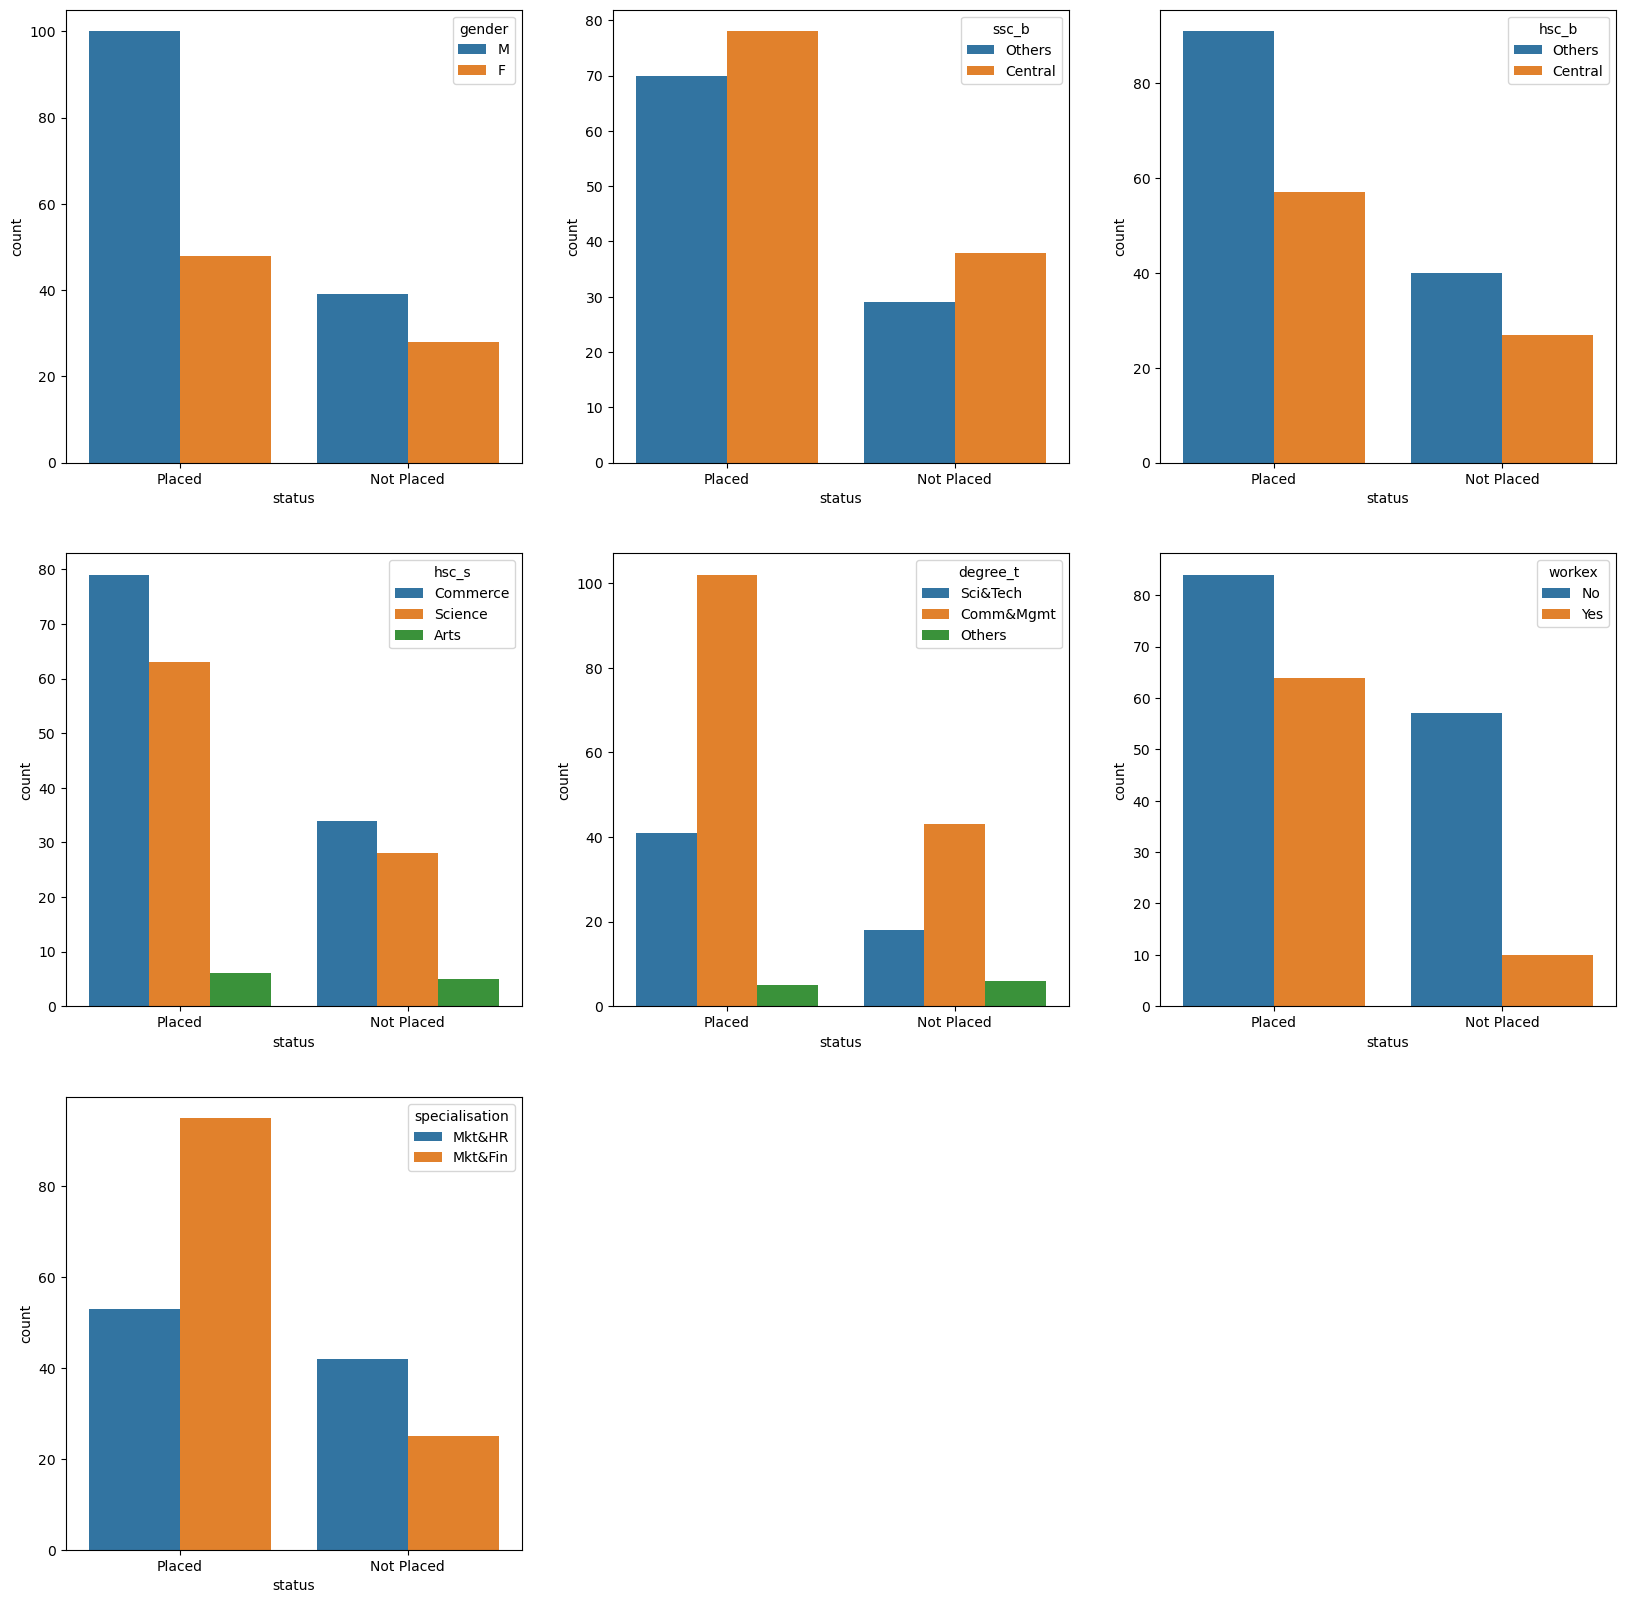

In [48]:
# understand categorical feature
fig,axss = plt.subplots(3,3, figsize=[20,20])
sns.countplot(x='status', hue='gender', data=place_df, ax=axss[0][0])
sns.countplot(x='status', hue='ssc_b', data=place_df, ax=axss[0][1])
sns.countplot(x='status', hue='hsc_b', data=place_df, ax=axss[0][2])
sns.countplot(x='status', hue='hsc_s', data=place_df, ax=axss[1][0])
sns.countplot(x='status', hue='degree_t', data=place_df, ax=axss[1][1])
sns.countplot(x='status', hue='workex', data=place_df, ax=axss[1][2])
sns.countplot(x='status', hue='specialisation', data=place_df, ax=axss[2][0])
fig.delaxes(axss[2][1])
fig.delaxes(axss[2][2])

<Axes: >

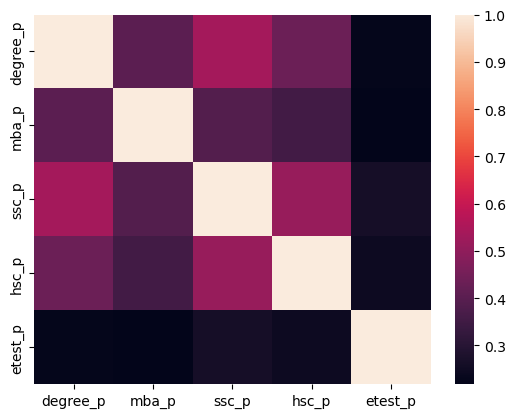

In [49]:
sns.heatmap(X[num_col].corr())

<Axes: xlabel='degree_p', ylabel='Density'>

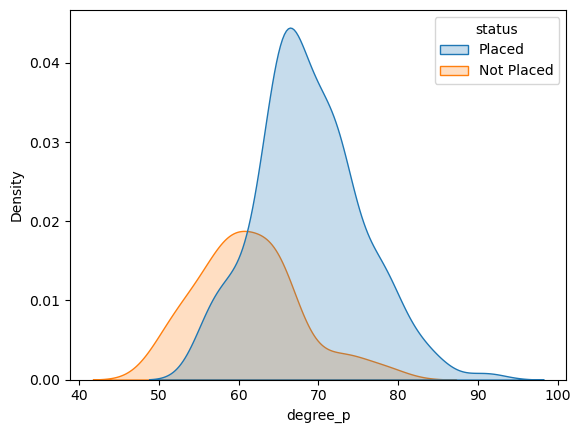

In [50]:
sns.kdeplot(data=place_df,x='degree_p',hue='status',shade=True)

<Axes: xlabel='ssc_p', ylabel='Density'>

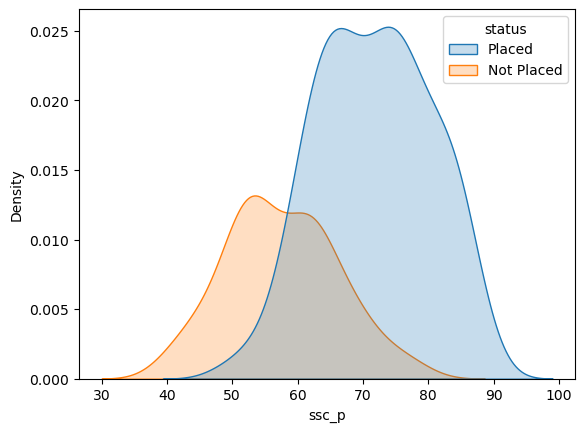

In [51]:
sns.kdeplot(data=place_df,x='ssc_p',hue='status',shade=True)

# Feature Preprocessing

In [52]:
X.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50


In [53]:
X.dtypes
# cat_cols = X.columns[X.dtypes == 'object']
# num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
dtype: object

In [54]:
num_col

['degree_p', 'mba_p', 'ssc_p', 'hsc_p', 'etest_p']

In [55]:
cat_col

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']

## Split dataset

In [56]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify = y, random_state = 1) #stratified sampling

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 172 observation with 12 features
test data has 43 observation with 12 features


In [57]:
X_train.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
190,F,64.0,Others,70.2,Central,Commerce,61.0,Comm&Mgmt,No,50.00,Mkt&Fin,62.50
131,F,74.9,Others,57.0,Others,Science,62.0,Others,Yes,80.00,Mkt&Fin,60.78
132,M,67.0,Others,68.0,Others,Commerce,64.0,Comm&Mgmt,Yes,74.40,Mkt&HR,53.49
55,M,60.4,Central,66.6,Others,Science,65.0,Comm&Mgmt,No,71.00,Mkt&HR,52.71
8,M,73.0,Central,79.0,Central,Commerce,72.0,Comm&Mgmt,No,91.34,Mkt&Fin,61.29


In [58]:
cat_col2 = X.columns[X.nunique() == 2].tolist()
cat_col3 = X.columns[X.nunique() == 3].tolist()

In [59]:
from sklearn.preprocessing import OrdinalEncoder

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_test = X_test.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_X_train[cat_col2] = ordinal_encoder.fit_transform(X_train[cat_col2])
label_X_test[cat_col2] = ordinal_encoder.transform(X_test[cat_col2])

label_X_train

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
190,0.0,64.00,1.0,70.20,0.0,Commerce,61.00,Comm&Mgmt,0.0,50.00,0.0,62.50
131,0.0,74.90,1.0,57.00,1.0,Science,62.00,Others,1.0,80.00,0.0,60.78
132,1.0,67.00,1.0,68.00,1.0,Commerce,64.00,Comm&Mgmt,1.0,74.40,1.0,53.49
55,1.0,60.40,0.0,66.60,1.0,Science,65.00,Comm&Mgmt,0.0,71.00,1.0,52.71
8,1.0,73.00,0.0,79.00,0.0,Commerce,72.00,Comm&Mgmt,0.0,91.34,0.0,61.29
...,...,...,...,...,...,...,...,...,...,...,...,...
56,1.0,63.00,1.0,71.40,1.0,Commerce,61.40,Comm&Mgmt,0.0,68.00,0.0,66.88
181,1.0,62.00,0.0,60.33,1.0,Science,64.21,Sci&Tech,0.0,63.00,1.0,60.02
187,1.0,78.50,0.0,65.50,0.0,Science,67.00,Sci&Tech,1.0,95.00,0.0,64.86
154,1.0,53.00,0.0,63.00,1.0,Science,60.00,Comm&Mgmt,1.0,70.00,0.0,53.20


In [60]:
# One hot encoding
# another way: get_dummies
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names_out(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

enc_ohe = OneHotEncoder()
enc_ohe.fit(label_X_train[cat_col3])

X_train = OneHotEncoding(label_X_train, enc_ohe, cat_col3)
X_test = OneHotEncoding(label_X_test, enc_ohe, cat_col3)

In [61]:
X_train.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
0,0.0,64.0,1.0,70.2,0.0,61.0,0.0,50.00,0.0,62.50,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,74.9,1.0,57.0,1.0,62.0,1.0,80.00,0.0,60.78,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,67.0,1.0,68.0,1.0,64.0,1.0,74.40,1.0,53.49,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,60.4,0.0,66.6,1.0,65.0,0.0,71.00,1.0,52.71,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,73.0,0.0,79.0,0.0,72.0,0.0,91.34,0.0,61.29,0.0,1.0,0.0,1.0,0.0,0.0


## Standardize/Normalize Data

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_col])

X_train[num_col] = scaler.transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

In [63]:
X_train.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
0,0.0,-0.270683,1.0,0.353829,0.0,-0.782887,0.0,-1.641176,0.0,0.000542,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.734778,1.0,-0.848388,1.0,-0.645477,1.0,0.565660,0.0,-0.296349,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.006049,1.0,0.153460,1.0,-0.370656,1.0,0.153717,1.0,-1.554681,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,-0.602762,0.0,0.025952,1.0,-0.233246,0.0,-0.096391,1.0,-1.689317,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.559514,0.0,1.155307,0.0,0.728626,0.0,1.399844,0.0,-0.208317,0.0,1.0,0.0,1.0,0.0,0.0


# Model Training and Result Evaluation

## Model Training

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [65]:
# Train the model
classifier_logistic.fit(X_train, y_train)

classifier_logistic.score(X_test, y_test)

0.8837209302325582

## Use Grid Search to Find Optimal Hyperparameters

In [66]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

### Logistic Regression

In [67]:
parameters = {
    'penalty':('l2','l1'),
    'C':(0.1, 0.15, 0.2, 0.3, 0.5, 0.7)#'C':(0.01, 0.05, 0.1, 0.2, 1)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear',random_state=0),parameters, cv = 5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid={'C': (0.1, 0.15, 0.2, 0.3, 0.5, 0.7),
                         'penalty': ('l2', 'l1')})

In [68]:
print_grid_search_metrics(Grid_LR)

Best score: 0.8838655462184875
Best parameters set:
C:0.15
penalty:l2


In [69]:
best_LR_model = Grid_LR.best_estimator_
best_LR_model.score(X_test, y_test)

0.8837209302325582

In [70]:
print('score (mean±std):')
means = Grid_LR.cv_results_['mean_test_score']
stds = Grid_LR.cv_results_['std_test_score']
for mean,std,params in zip(means,stds,Grid_LR.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean,std*2,params))

score (mean±std):
0.872 (+/-0.060) for {'C': 0.1, 'penalty': 'l2'}
0.825 (+/-0.100) for {'C': 0.1, 'penalty': 'l1'}
0.884 (+/-0.063) for {'C': 0.15, 'penalty': 'l2'}
0.837 (+/-0.082) for {'C': 0.15, 'penalty': 'l1'}
0.884 (+/-0.074) for {'C': 0.2, 'penalty': 'l2'}
0.848 (+/-0.080) for {'C': 0.2, 'penalty': 'l1'}
0.884 (+/-0.065) for {'C': 0.3, 'penalty': 'l2'}
0.866 (+/-0.096) for {'C': 0.3, 'penalty': 'l1'}
0.884 (+/-0.065) for {'C': 0.5, 'penalty': 'l2'}
0.866 (+/-0.081) for {'C': 0.5, 'penalty': 'l1'}
0.872 (+/-0.081) for {'C': 0.7, 'penalty': 'l2'}
0.854 (+/-0.124) for {'C': 0.7, 'penalty': 'l1'}


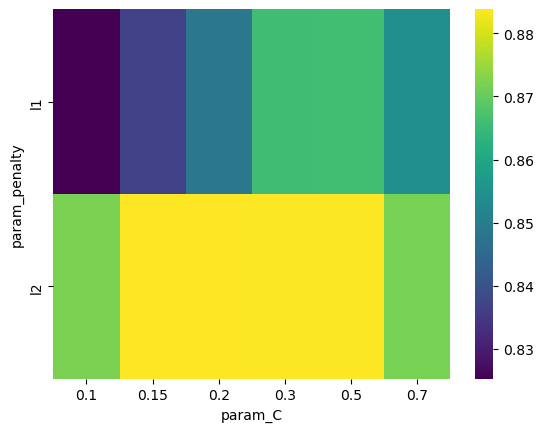

In [71]:
LR_models = pd.DataFrame(Grid_LR.cv_results_)
res = (LR_models.pivot(index='param_penalty', columns='param_C', values='mean_test_score')
            )
_ = sns.heatmap(res, cmap='viridis')

In [72]:
coefficients = best_LR_model.coef_[0]
indices = np.argsort(abs(coefficients))[::-1]
print ("Logistic Regression Coefficients")
for ind in range(X_train.shape[1]):
    print ("{0} : {1}".format(X_train.columns[indices[ind]],round(coefficients[indices[ind]], 4)))

Logistic Regression Coefficients
ssc_p : 1.0841
degree_p : 0.6477
hsc_p : 0.6425
workex : 0.6129
mba_p : -0.4812
degree_t_Comm&Mgmt : 0.4146
gender : 0.4024
specialisation : -0.2234
hsc_s_Science : 0.2032
ssc_b : 0.1413
hsc_s_Arts : 0.1356
degree_t_Sci&Tech : -0.0939
etest_p : -0.0736
hsc_b : 0.0552
hsc_s_Commerce : -0.0235
degree_t_Others : -0.0054


### KNN

In [73]:
parameters = {
    'n_neighbors':[10, 11, 12]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 11, 12]})

In [74]:
print_grid_search_metrics(Grid_KNN)

Best score: nan
Best parameters set:
n_neighbors:10


In [75]:
best_KNN_model = Grid_KNN.best_estimator_
best_KNN_model.score(np.array(X_test), np.array(y_test))

0.8372093023255814

### Random Forest

In [76]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [55,60,65],
    'max_depth': [10,12,15,18]
}
Grid_RF = GridSearchCV(RandomForestClassifier(random_state=0),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [10, 12, 15, 18],
                         'n_estimators': [55, 60, 65]})

In [77]:
print_grid_search_metrics(Grid_RF)

Best score: 0.8662184873949579
Best parameters set:
max_depth:10
n_estimators:55


In [78]:
best_RF_model = Grid_RF.best_estimator_
best_RF_model.score(X_test, y_test)

0.8372093023255814

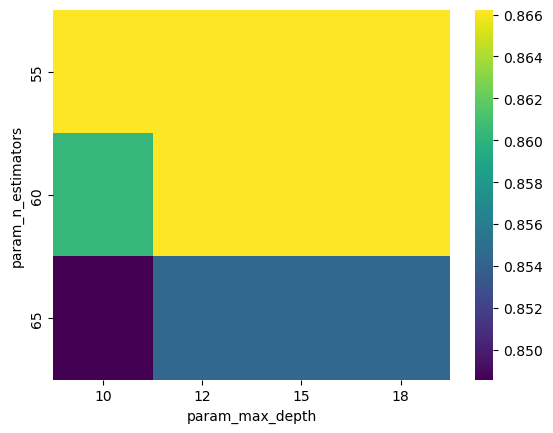

In [79]:
RF_models = pd.DataFrame(Grid_RF.cv_results_)
res = (RF_models.pivot(index='param_n_estimators', columns='param_max_depth', values='mean_test_score')
            )
_ = sns.heatmap(res, cmap='viridis')

In [80]:
importances = best_RF_model.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X_train.shape[1]):
    print ("{0} : {1}".format(X_train.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
ssc_p : 0.2367
degree_p : 0.2227
hsc_p : 0.2127
mba_p : 0.0897
etest_p : 0.0655
specialisation : 0.0347
workex : 0.0338
gender : 0.0248
degree_t_Comm&Mgmt : 0.0128
ssc_b : 0.0126
hsc_s_Science : 0.0124
degree_t_Sci&Tech : 0.0122
hsc_s_Commerce : 0.0102
hsc_b : 0.0076
degree_t_Others : 0.007
hsc_s_Arts : 0.0045


### SVM

In [81]:
parameters_svm = {
    'C': np.logspace(-3, 3, 7), # 从 0.001 到 1000 以10的指数增长
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001]
}

Grid_SVM = GridSearchCV(SVC(probability=True,random_state=0), parameters_svm, cv=5)
Grid_SVM.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=0),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']})

In [82]:
print_grid_search_metrics(Grid_SVM)

Best score: 0.8954621848739496
Best parameters set:
C:10.0
gamma:0.01
kernel:rbf


In [83]:
best_SVM_model = Grid_SVM.best_estimator_
best_SVM_model.score(X_test, y_test)

0.8837209302325582

## Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

In [84]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ()

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    # class_names = ['Not','Place']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [85]:
confusion_matrices = [
    ("Random Forest", confusion_matrix(np.array(y_test),best_RF_model.predict(np.array(X_test)))),
    ("Logistic Regression", confusion_matrix(np.array(y_test),best_LR_model.predict(np.array(X_test)))),
    ("KNN", confusion_matrix(np.array(y_test), best_KNN_model.predict(np.array(X_test)))),
    ("SVM", confusion_matrix(np.array(y_test), best_SVM_model.predict(np.array(X_test))))
]

draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 0.8372093023255814
precision is: 0.8709677419354839
recall is: 0.9

Logistic Regression
Accuracy is: 0.8837209302325582
precision is: 0.8787878787878788
recall is: 0.9666666666666667

KNN
Accuracy is: 0.8372093023255814
precision is: 0.8285714285714286
recall is: 0.9666666666666667

SVM
Accuracy is: 0.8837209302325582
precision is: 0.8787878787878788
recall is: 0.9666666666666667



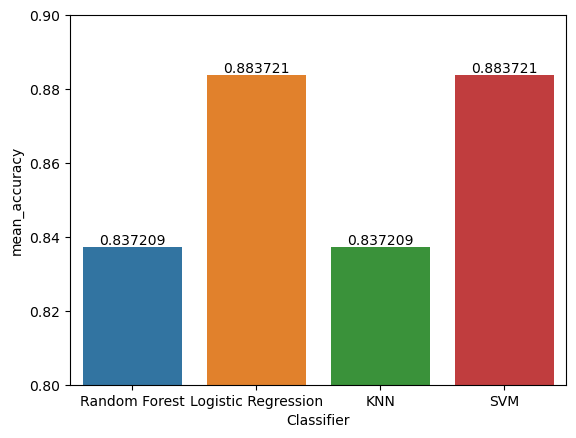

In [86]:
eva = pd.DataFrame()
eva['Classifier'] = ['Random Forest','Logistic Regression','KNN','SVM']
eva['mean_accuracy'] = [best_RF_model.score(np.array(X_test), np.array(y_test)), 
                        best_LR_model.score(np.array(X_test), np.array(y_test)), 
                        best_KNN_model.score(np.array(X_test), np.array(y_test)),
                        best_SVM_model.score(np.array(X_test), np.array(y_test))]
fig = sns.barplot(data=eva,y='mean_accuracy',x='Classifier')
fig.set_ylim(0.8,0.9)
for i in fig.containers:
    fig.bar_label(i,)
plt.show()

### ROC of RF Model

In [87]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf, pos_label='Placed')

In [88]:
best_RF_model.predict_proba(X_test)

array([[0.76565657, 0.23434343],
       [0.09393939, 0.90606061],
       [0.18181818, 0.81818182],
       [0.18181818, 0.81818182],
       [0.72727273, 0.27272727],
       [0.13636364, 0.86363636],
       [0.01818182, 0.98181818],
       [0.16969697, 0.83030303],
       [0.13333333, 0.86666667],
       [0.21818182, 0.78181818],
       [0.96363636, 0.03636364],
       [0.52727273, 0.47272727],
       [0.07272727, 0.92727273],
       [0.43636364, 0.56363636],
       [0.85454545, 0.14545455],
       [0.49393939, 0.50606061],
       [0.33636364, 0.66363636],
       [0.03636364, 0.96363636],
       [0.70505051, 0.29494949],
       [0.18181818, 0.81818182],
       [0.21818182, 0.78181818],
       [0.05454545, 0.94545455],
       [0.9       , 0.1       ],
       [0.2       , 0.8       ],
       [0.90909091, 0.09090909],
       [0.18181818, 0.81818182],
       [0.        , 1.        ],
       [0.10909091, 0.89090909],
       [0.10909091, 0.89090909],
       [0.47272727, 0.52727273],
       [0.

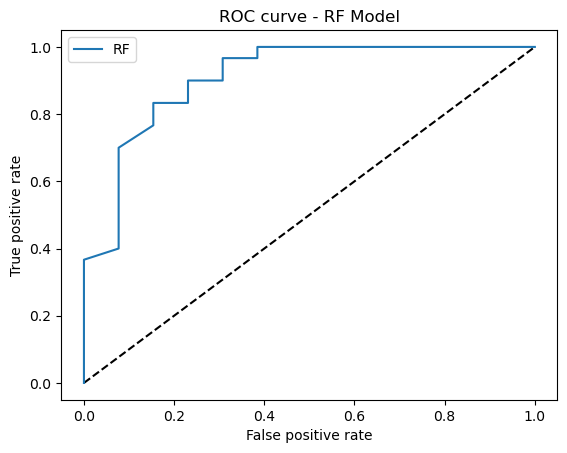

In [101]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF Model')
plt.legend(loc='best')
plt.show()

In [90]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.9089743589743591

### ROC of LR Model

In [91]:
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_pred_lr, pos_label='Placed')

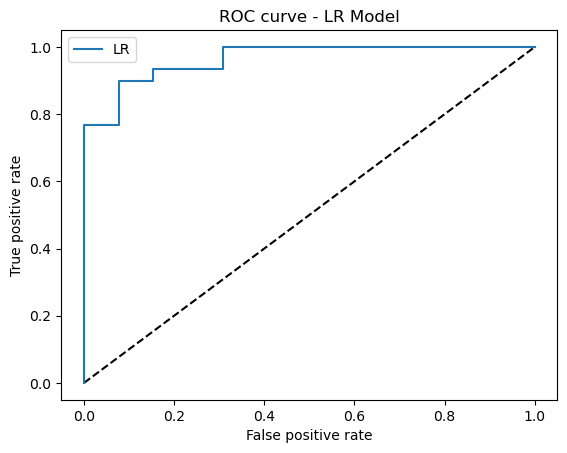

In [92]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [93]:
metrics.auc(fpr_lr,tpr_lr)

0.9641025641025641

### ROC of KNN Model

In [94]:
y_pred_knn = best_KNN_model.predict_proba(np.array(X_test))[:, 1]
fpr_knn, tpr_knn, thresh = roc_curve(y_test, y_pred_knn, pos_label='Placed')

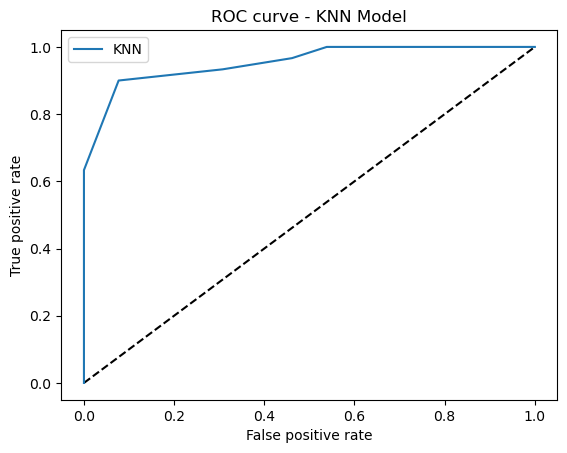

In [95]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - KNN Model')
plt.legend(loc='best')
plt.show()

In [96]:
metrics.auc(fpr_knn,tpr_knn)

0.9538461538461539

### ROC of KNN Model

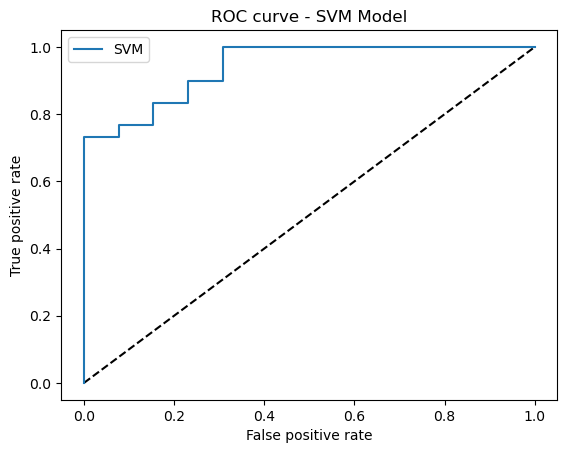

In [97]:
y_pred_svm = best_SVM_model.predict_proba(np.array(X_test))[:, 1]
fpr_svm, tpr_svm, thresh = roc_curve(y_test, y_pred_svm, pos_label='Placed')

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - SVM Model')
plt.legend(loc='best')
plt.show()

In [98]:
metrics.auc(fpr_svm,tpr_svm)

0.941025641025641

## Summary

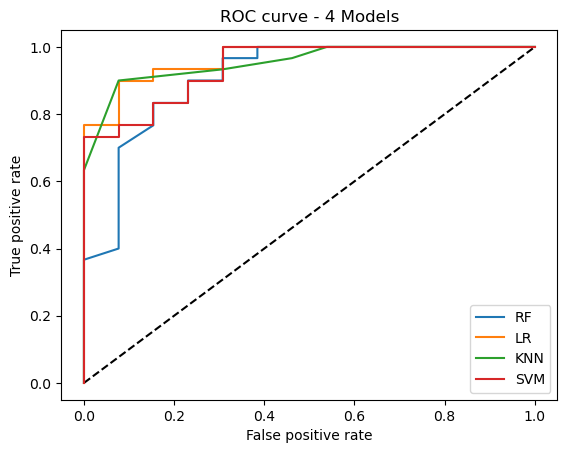

In [99]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - 4 Models')
plt.legend(loc='best')
plt.show()

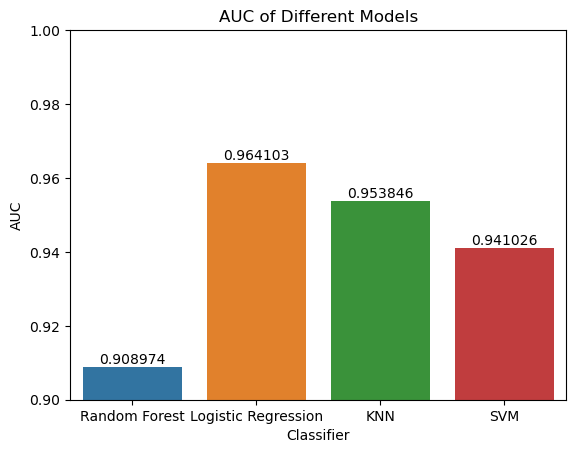

In [100]:
eva_auc = pd.DataFrame()
eva_auc['Classifier'] = ['Random Forest','Logistic Regression','KNN','SVM']
eva_auc['AUC'] = [metrics.auc(fpr_rf,tpr_rf), 
                metrics.auc(fpr_lr,tpr_lr), 
                metrics.auc(fpr_knn,tpr_knn),
                metrics.auc(fpr_svm,tpr_svm)]
fig = sns.barplot(data=eva_auc,y='AUC',x='Classifier')
fig.set_ylim(0.9,1)
for i in fig.containers:
    fig.bar_label(i,)
plt.title('AUC of Different Models')
plt.show()